# Decision Trees-can be used for multiclass classifier

## Making Decision Trees

## Cars-Practice

In [ ]:
from tree import tree, classify
car=["low","med","4","more","med","high"]
print(classify(car,tree))#output is vgood
#already build decision tree on cars just showing that if th features how tree predicts

## Gini Impurity

In [2]:
#manual implementation of Gini Impurity
from collections import Counter

labels = ["unacc", "unacc", "acc", "acc", "good", "good"]
#labels = ["unacc","unacc","unacc", "good", "vgood", "vgood"]
#labels = ["unacc", "unacc", "unacc", "unacc", "unacc", "unacc"]

impurity = 1
label_counts = Counter(labels)#function gives count of labels as dictionary
for label in label_counts:
  probability_of_label = label_counts[label]/len(labels)#since dictionary label are keys so each value is divided by total(prob) then squared and subtracted from 1
  impurity -= probability_of_label ** 2
  
print(impurity)

0.6666666666666665


In [1]:
#Function to calculate Gini Impurity
def gini(dataset):
  impurity = 1
  label_counts = Counter(dataset)#dataset means like all th value it has(the node) then we count each then find prob and then subtracted
  for label in label_counts:
    prob_of_label = label_counts[label] / len(dataset)
    impurity -= prob_of_label ** 2
  return impurity

### Information Gain

In [3]:
#use of information gain
from collections import Counter

unsplit_labels = ["unacc", "unacc", "unacc", "unacc", "unacc", "unacc", "good", "good", "good", "good", "vgood", "vgood", "vgood"]

split_labels_1 = [
  ["unacc", "unacc", "unacc", "unacc", "unacc", "unacc", "good", "good", "vgood"], 
  [ "good", "good"], 
  ["vgood", "vgood"]
]

split_labels_2 = [
  ["unacc", "unacc", "unacc", "unacc","unacc", "unacc", "good", "good", "good", "good"], 
  ["vgood", "vgood", "vgood"]
]

def gini(dataset):
  impurity = 1
  label_counts = Counter(dataset)
  for label in label_counts:
    prob_of_label = label_counts[label] / len(dataset)
    impurity -= prob_of_label ** 2
  return impurity

info_gain=gini(unsplit_labels)
for i in split_labels_1:
  info_gain-=gini(i)
print(info_gain)
info_gain=gini(unsplit_labels)
for i in split_labels_2:
  info_gain-=gini(i)
print(info_gain)
#need to see that high info gain means(of unsplit_labels) - (gini of split) so when we split all has less gini means good info gain

0.14522609394404257
0.15905325443786977


In [4]:
#for normal info gain
def information_gain(starting_labels, split_labels):
  info_gain = gini(starting_labels)
  for subset in split_labels:
    info_gain -= gini(subset)
  return info_gain

## Weighted Information Gain

In [6]:
#Use of Weighted Info Gain
from collections import Counter

cars = [['med', 'low', '3', '4', 'med', 'med'], ['med', 'vhigh', '4', 'more', 'small', 'high'], ['high', 'med', '3', '2', 'med', 'low'], ['med', 'low', '4', '4', 'med', 'low'], ['med', 'low', '5more', '2', 'big', 'med'], ['med', 'med', '2', 'more', 'big', 'high'], ['med', 'med', '2', 'more', 'med', 'med'], ['vhigh', 'vhigh', '2', '2', 'med', 'low'], ['high', 'med', '4', '2', 'big', 'low'], ['low', 'low', '2', '4', 'big', 'med']]

car_labels = ['acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'good']
#car labels is the final wala good ,acceptable or not and so on
#the cars is the features it has based on it car_labels will be  given
def split(dataset, labels, column):
    data_subsets = []
    label_subsets = []
    counts = list(set([data[column] for data in dataset]))
    counts.sort()
    for k in counts:
        new_data_subset = []
        new_label_subset = []
        for i in range(len(dataset)):
            if dataset[i][column] == k:
                new_data_subset.append(dataset[i])
                new_label_subset.append(labels[i])
        data_subsets.append(new_data_subset)
        label_subsets.append(new_label_subset)
    return data_subsets, label_subsets#this will split the datasets based on the column(we send) like the feature column then splits all into that like number of doors split into 3 subset(2,3,4) like that and give us
    #data subsets is all the data of split together
    #label subsets is all the labels of split
def gini(dataset):
  impurity = 1
  label_counts = Counter(dataset)
  for label in label_counts:
    prob_of_label = label_counts[label] / len(dataset)
    impurity -= prob_of_label ** 2
  return impurity

def information_gain(starting_labels, split_labels):
  info_gain = gini(starting_labels)
  for subset in split_labels:
    info_gain -= gini(subset) * len(subset) / len(starting_labels)#weighted info gain
  return info_gain

for i in range(6):
  split_data, split_labels = split(cars, car_labels, i)
  print(information_gain(car_labels, split_labels))#here we calculate the info gain for all features and print(like to first split on what)

0.27333333333333343
0.04000000000000001
0.10666666666666669
0.3066666666666667
0.15000000000000002
0.29000000000000004


## Recursive Decision Tree Building

In [ ]:
from tree import *

car_data = [['med', 'low', '3', '4', 'med', 'med'], ['med', 'vhigh', '4', 'more', 'small', 'high'], ['high', 'med', '3', '2', 'med', 'low'], ['med', 'low', '4', '4', 'med', 'low'], ['med', 'low', '5more', '2', 'big', 'med'], ['med', 'med', '2', 'more', 'big', 'high'], ['med', 'med', '2', 'more', 'med', 'med'], ['vhigh', 'vhigh', '2', '2', 'med', 'low'], ['high', 'med', '4', '2', 'big', 'low'], ['low', 'low', '2', '4', 'big', 'med']]

car_labels = ['acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'good']

def find_best_split(dataset, labels):
    best_gain = 0
    best_feature = 0
    for feature in range(len(dataset[0])):
        data_subsets, label_subsets = split(dataset, labels, feature)#split from previous where it loops through all and gives the data subsets and label subsets
        gain = information_gain(labels, label_subsets)#using the split we calculate the info gain
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    return best_feature, best_gain#return the best feature having best info gain

def build_tree(data, labels):#recursive tree building function
  best_feature, best_gain = find_best_split(data, labels)#from datasets get bst feature and best gain
  if best_gain == 0:
    return Counter(labels)#if best gain then it is the leaf node
  data_subsets, label_subsets = split(data, labels, best_feature)
  branches = []
  for i in range(len(data_subsets)):#the ngo through each data subsets
    branch = build_tree(data_subsets[i], label_subsets[i])#call the function recursively and append branches i.e the count of it returns
    branches.append(branch)#append the branches
  return branches#return the branches
  #like each split,go to each subsets and return if it is leaf node so recursively the branches returns and we get in end all branches
tree = build_tree(car_data, car_labels)
print_tree(tree)#function yet to learn 

## Classying new data

In [ ]:
from tree import *
import operator
print_tree(tree)
test_point = ['vhigh', 'low', '3', '4', 'med', 'med']
#print tree gives
Splitting on Estimated Saftey
--> Branch high:
  Splitting on Person Capacity
  --> Branch 2:
    Counter({'unacc': 174})
  --> Branch 4:
    Splitting on Buying Price
    --> Branch high:
      Splitting on Price of maintenance
      --> Branch high:
        Counter({'acc': 11})
      --> Branch low:
        Counter({'acc': 12})
      --> Branch med:
        Counter({'acc': 11})
      --> Branch vhigh:
        Counter({'unacc': 12})
    --> Branch low:
      Splitting on Price of maintenance
      --> Branch high:
        Splitting on Size of luggage boot
        --> Branch big:
          Counter({'vgood': 4})
        --> Branch med:
          Splitting on Number of doors
          --> Branch 2:
            Counter({'acc': 1})
          --> Branch 3:
            Counter({'acc': 1})
          --> Branch 4:
            Counter({'vgood': 1})
          --> Branch 5more:
            Counter({'vgood': 1})
        --> Branch small:
          Counter({'acc': 3})
      --> Branch low:
        Splitting on Size of luggage boot
        --> Branch big:
          Counter({'vgood': 3})
        --> Branch med:
          Splitting on Number of doors
          --> Branch 2:
            Counter({'good': 1})
          --> Branch 3:
            ...
        something like this

In [ ]:
#writing classify function
from tree import *
import operator

test_point = ['vhigh', 'low', '3', '4', 'med', 'med']

def classify(datapoint, tree):
  if isinstance(tree, Leaf):#if it is a leaf we need to return the label with max count
    return max(tree.labels.items(), key=operator.itemgetter(1))[0]

  value = datapoint[tree.feature]#otherwise we see the featur we are splitting
  for branch in tree.branches:#go through all branches 
    if branch.value == value:#if the branch we split is equal to the value
      return classify(datapoint, branch)#call function again with that branch as tree and goes till leaf node got

print(classify(test_point, tree))#output comes as unacceptable

## Decision Tree in Classifier

In [ ]:
#using sklearn
from cars import training_points, training_labels, testing_points, testing_labels
from sklearn.tree import DecisionTreeClassifier

print(training_points[0])
print(training_labels[0])
classifier=DecisionTreeClassifier()
classifier.fit(training_points,training_labels)
test_predict=classifier.predict(testing_points)
print(classifier.score(testing_points,testing_labels))
#output is 
[4.0, 3.0, 4.0, 2.0, 1.0, 2.0]
acc
0.9710982658959537

## Decision Tree Limitations

In [ ]:
#pruning
from cars import training_points, training_labels, testing_points, testing_labels
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state = 0,max_depth=11)#telling max depth to decrease
classifier.fit(training_points, training_labels)
print(classifier.score(testing_points, testing_labels))
print(classifier.tree_.max_depth)

## Practice-Decision Tree-Iris Dataset

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
X=df.iloc[:,1:5]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y=df.iloc[:,5]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
classifier=DecisionTreeClassifier()

In [26]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
predict=classifier.predict(X_test)
predict

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [28]:
classifier.score(X_test,y_test)

0.9333333333333333

In [29]:
accuracy_score(y_test,predict)

0.9333333333333333

In [30]:
from sklearn.metrics import confusion_matrix

<Axes: >

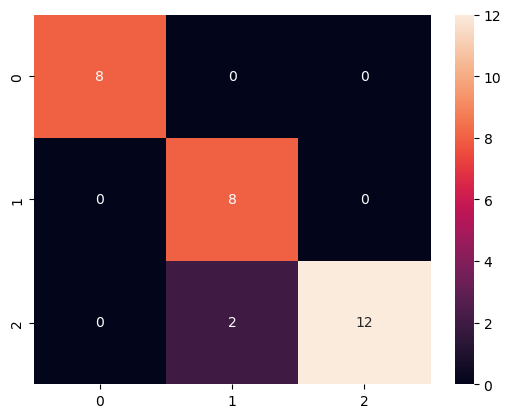

In [31]:
cm=confusion_matrix(y_test,predict)
sns.heatmap(cm,annot=True)

In [32]:
classifier.feature_importances_##gives the importance of each feature

array([0.01253133, 0.01253133, 0.03626662, 0.93867072])

In [33]:
classifier.tree_.max_depth#tells us the max depth of tree

5

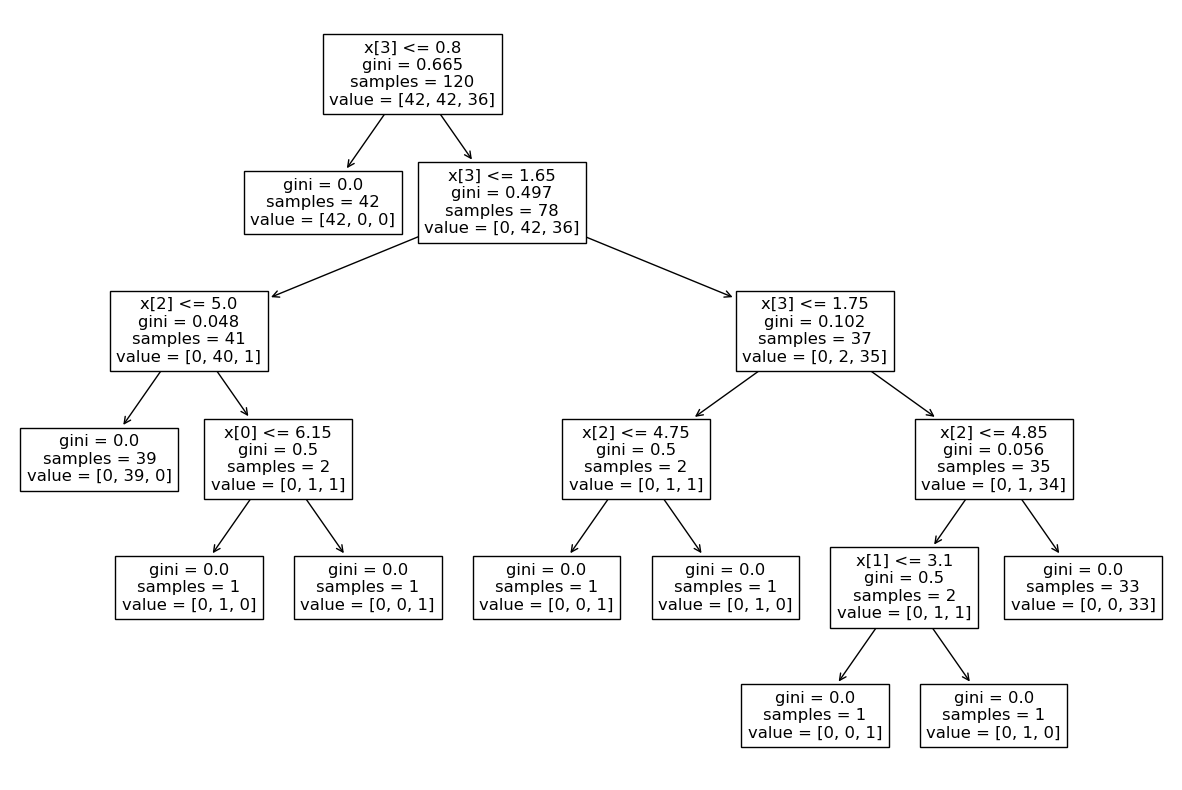

In [34]:
#plot me the tree 
from sklearn import tree#how to plot the tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier)
plt.show()